Clustering:
1. K-means
2. GMM
3. Practical Example
4. Hierarchical Clustering


# 1. K-means clustering 
a) Data genearation

b) Generate 2D data of mean (0.5 0) (5 5) (5 1) (10 1.5) of each 100 point

c) Sigma = [1 0; 0 1];

(400,)


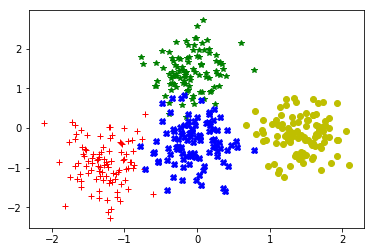

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation

mu1=np.array([0.5,0])
mu2=np.array([5,5])
mu3=np.array([5,1])
mu4=np.array([10,1.5])

# mu1=np.array([0.5,0])
# mu2=np.array([5,2.5])
# mu3=np.array([5,1])
# mu4=np.array([10,1.5])




Sigma1=np.array([[1,0.9],[0.9,1]])
Sigma=np.array([[1,0],[0,1]])
f1=np.random.multivariate_normal(mu1,Sigma,100)
f2=np.random.multivariate_normal(mu2,Sigma,100)
f3=np.random.multivariate_normal(mu3,Sigma,100)
f4=np.random.multivariate_normal(mu4,Sigma,100)
F=np.concatenate((f1,f2,f3,f4))

F=(F-(np.mean(F,axis=0)))/(np.std(F,axis=0)) # data normalization
data=F

#Plotting
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']

lab1=np.zeros(f1.shape[0])
lab2=np.ones(f2.shape[0])
lab3=np.tile([2],f3.shape[0])
lab4=np.tile([3],f4.shape[0])
lab=np.concatenate((lab1,lab2,lab3,lab4))
print(lab.shape)
%matplotlib inline
plt.figure()
for l in range(4):
    id=np.where(lab==l)
    
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])

## Cluster Initialization

a) Randomly initialize the cluster centers



[[ 1.66890041 -0.16838706]
 [-0.05230971  0.81286423]
 [-1.19368318 -0.24558895]
 [-0.12351771  0.94993916]]


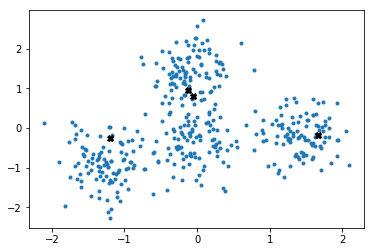

In [11]:
K=4  # no of clusters
KMI=20  # no of iterations

# random initialization of clusters
idx=np.random.randint(0,F.shape[0],K)
Cents=F[idx,:]
print(Cents)

# initialized a array to store distance, assigned label, minimum distance
DAL=np.zeros((F.shape[0],K+2))



plt.figure()
plt.plot(F[:,0],F[:,1],'.')
plt.plot(Cents[:,0],Cents[:,1],'X',color='k')


## Cluster assignment and re-estimation Stage 

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

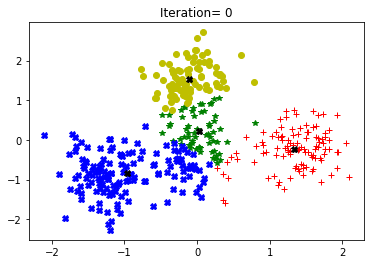

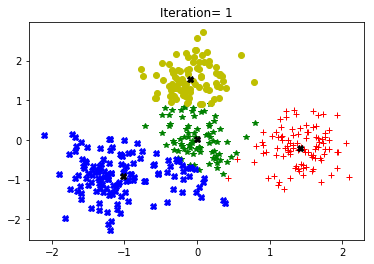

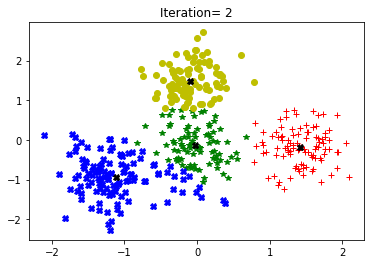

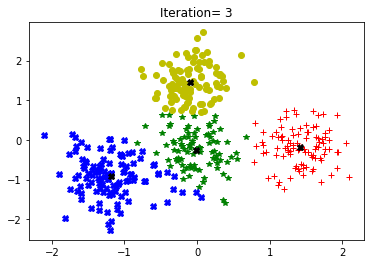

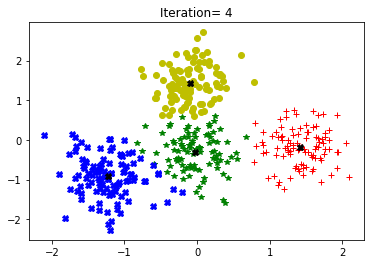

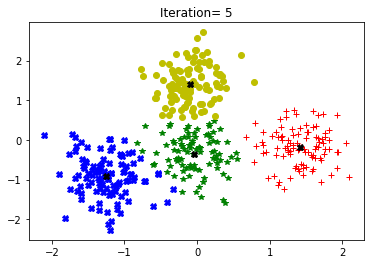

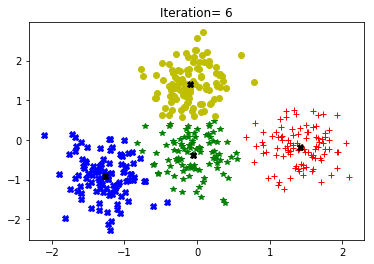

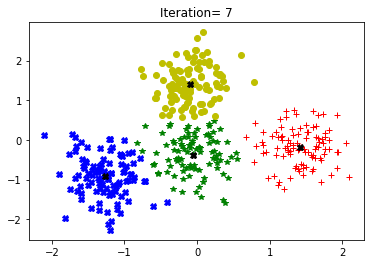

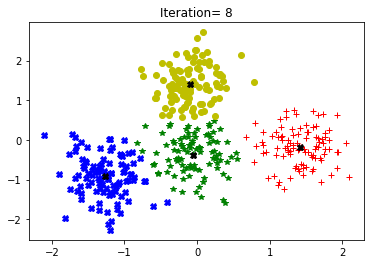

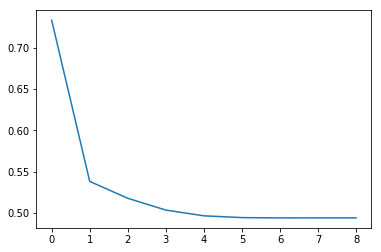

In [12]:
error=[]
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


for n in range(KMI):
# assignment stage
  for i in range(F.shape[0]):
    for j in range(K):
      DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])

    Dist=np.min(DAL[i,:K])
    ind=int((np.where(Dist==DAL[i,:K])[0]))
    DAL[i,K]=ind
    DAL[i,K+1]=Dist

# re-estimation stage
  for i in range(K):
    ind=np.where(DAL[:,K]==i)
    Cents[i,:]=np.mean(F[ind,:][0],axis=0)

  error.append(np.mean(DAL[:,K+1]))  
  # print(Cents)

# for ploting 
  plt.figure()
  for l in range(K):
    id=np.where(DAL[:,K]==l)
    plt.plot(F[id,0],F[id,1],'.',color=clr[l],marker=mrk[l])
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
   if abs(error[n]-error[n-1])<eps:
    break




# plot the error curve
plt.figure()
plt.plot(error)

In [13]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=DAL[:,K]
print(pred_lab)
print(lab)
print('Performance=',metrics.homogeneity_score(pred_lab,lab))

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 3. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# 2. GMM Clustering

##1.  Data generation

a) Same as earlier

(400,)


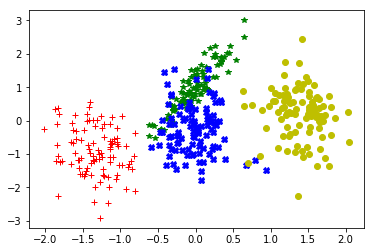

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation

# mu1=np.array([0.5,0])
# mu2=np.array([5,5])
# mu3=np.array([5,1])
# mu4=np.array([10,1.5])

mu1=np.array([0.5,0])
mu2=np.array([5,2.5])# mu2=5,5
mu3=np.array([5,1])
mu4=np.array([10,1.5])





Sigma=np.array([[1,0],[0,1]])
Sigma1=np.array([[1,0.9],[0.9,1]])
f1=np.random.multivariate_normal(mu1,Sigma,100)
f2=np.random.multivariate_normal(mu2,Sigma1,100)# change it to sigma
f3=np.random.multivariate_normal(mu3,Sigma,100)
f4=np.random.multivariate_normal(mu4,Sigma,100)
F=np.concatenate((f1,f2,f3,f4))

data=(F-(np.mean(F,axis=0)))/(np.std(F,axis=0)) # data normalization


# ploting
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']

lab1=np.zeros(f1.shape[0])
lab2=np.ones(f2.shape[0])
lab3=np.tile([2],f3.shape[0])
lab4=np.tile([3],f4.shape[0])
lab=np.concatenate((lab1,lab2,lab3,lab4))
print(lab.shape)

plt.figure()
for l in range(4):
    id=np.where(lab==l)
    #print(l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])



## 2. Initialization

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [15]:
#%% Initialisations

def initialization(data,K):

  d=data.shape[1] # dimension of data


# mean initialization
  pick_means=np.random.randint(0,data.shape[0],K)
  means=data[pick_means,:]
  means=np.transpose(means)

# covariance matrix initialization
  Covariance=np.zeros((d,d,K))
  for i in range(K):
    Covariance[:,:,i]=np.eye(d)*np.max(data,axis=None)    
    
#mixing coefficients
  proportions=np.ones((K,1))/K

  theta=[means,Covariance,proportions]

  Cents=means.T
  # plt.figure()
  # plt.plot(data[:,0],data[:,1],'.')
  # plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  return theta



##3. Expectation stage
$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [16]:
# Expectation stage

#%% E-Step GMM
from scipy.stats import multivariate_normal
def E_Step_GMM(data,K,theta):

    means=theta[0]
    Covariance=theta[1]
    proportions=theta[2]
    #Computing responsibility coefficients of each point for each cluster.
    responsibility=np.zeros((len(data),K))
    for i in range(K):
        itr=0   # increase w.r.t datapoint 
        for x in data:
            normalising=0
# Compute probability of xj for cluster i 
            N_xn=multivariate_normal.pdf(x,mean=means[:,i], cov=Covariance[:,:,i])
            # # only to avoid 
            # if N_xn<10**(-20):
            #   N_xn=10**(-20)


            responsibility[itr][i]=proportions[i]*N_xn

            for j in range(K):
                normalising+=proportions[j]*(multivariate_normal.pdf(x,mean=means[:,j], cov=Covariance[:,:,j])+10**(-20))
            responsibility[itr][i]=responsibility[itr][i]/normalising
            itr+=1

    return responsibility

## 3. Maximization stage
a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [17]:
# Maximization stage

#%% M-STEP GMM
def M_Step_GMM(data,responsibility):
    [N,K]=np.shape(responsibility) #N is number of data points
    d=data.shape[1]
    
    #Compute Proportions
    Nk=np.sum(responsibility,axis=0)
    proportions=Nk/N
        
    #Compute Means
    means=np.zeros((K,d))        
    for k in range(K):
        temp1=data
        temp2=responsibility[:,k]
        temp=temp1*temp2[:,None] #multiplying a vector with multiple columns
        means[k]=(1/Nk[k])*np.sum(temp,axis=0)  
    means=np.transpose(means)
        
    #Compute Covariance
    Covariance=np.zeros((d,d,K))        
    for k in range(K):
        for n in range(N):
            temp1=data[n,:]-means[:,k]
            temp2=np.outer(temp1,np.transpose(temp1)) # vector outer product
            temp=responsibility[n,k]*temp2
            Covariance[:,:,k]+=temp
        Covariance[:,:,k]=(1/Nk[k])*Covariance[:,:,k]
    
    theta=[means,Covariance,proportions]
    Likelihood=0
    log_likelihood=0
    for n in range(N):
        for k in range(K):
            Likelihood+=proportions[k]*(multivariate_normal.pdf(data[n,:],mean=means[:,k], cov=Covariance[:,:,k]))
        log_likelihood+=np.log(Likelihood)
            
    return theta, log_likelihood

## 4. Final run (EM algorithem)
a) initialization

b)Itterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each itteration

/home/jagabandhu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


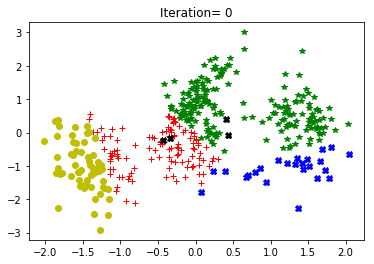

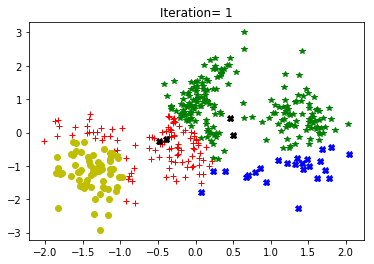

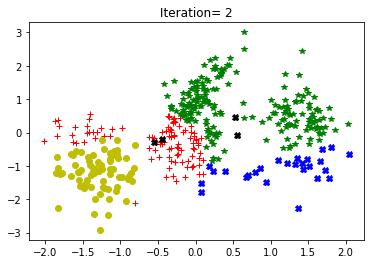

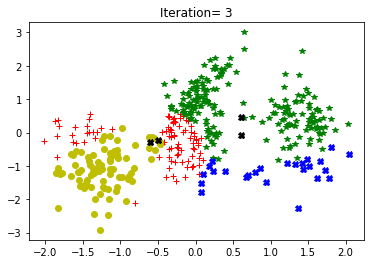

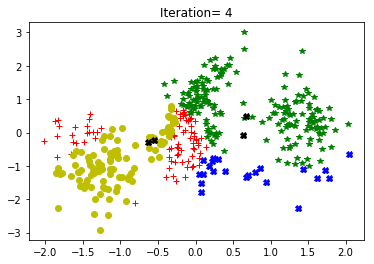

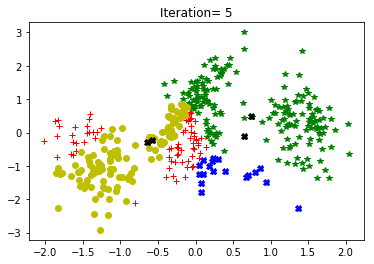

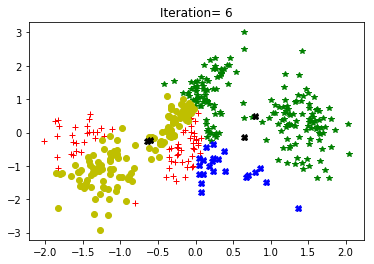

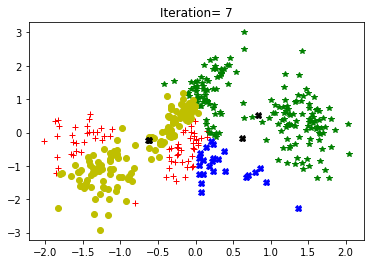

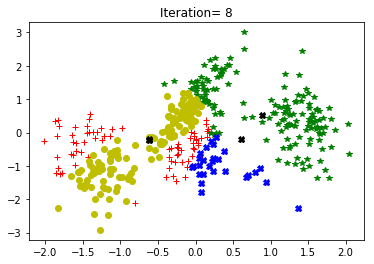

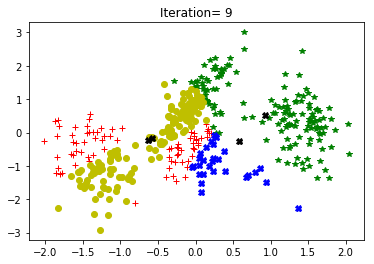

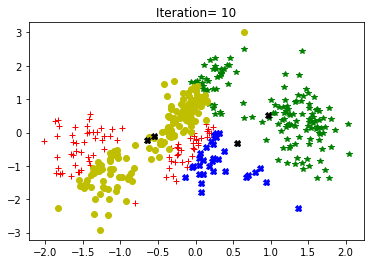

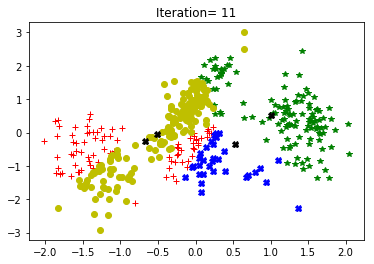

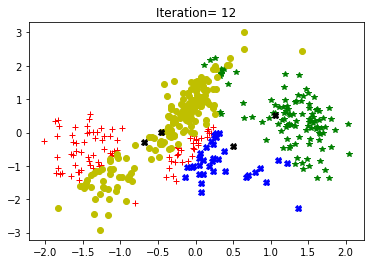

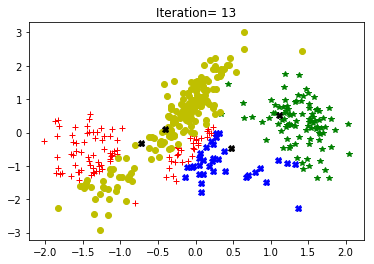

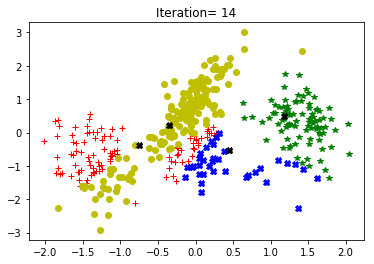

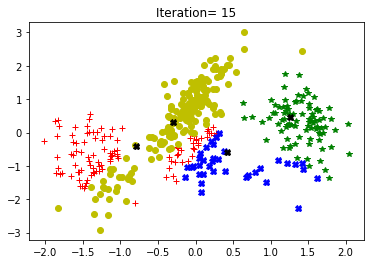

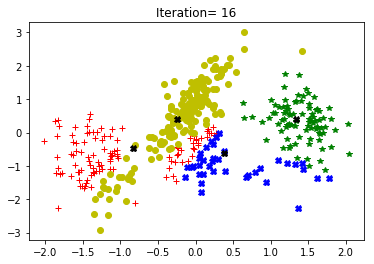

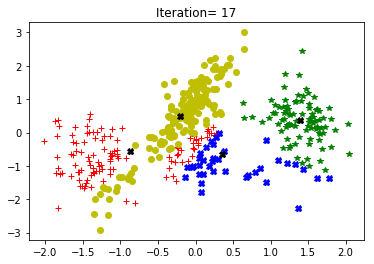

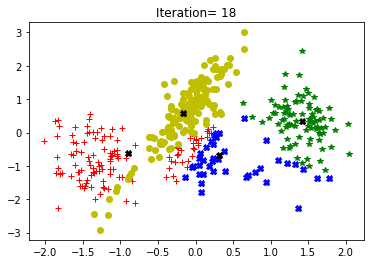

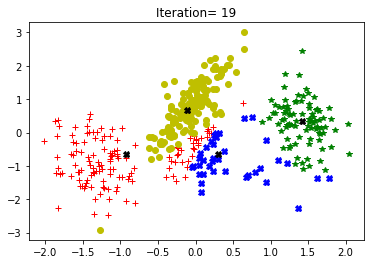

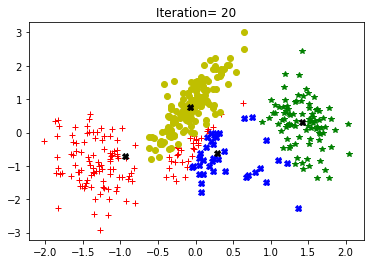

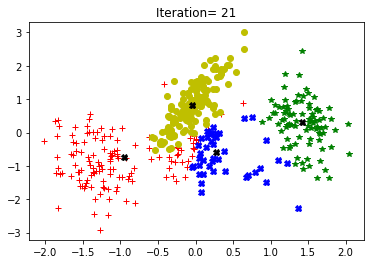

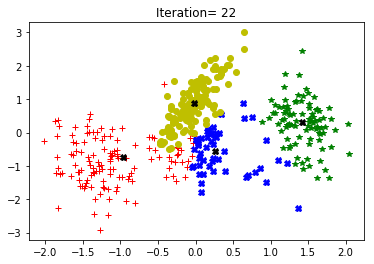

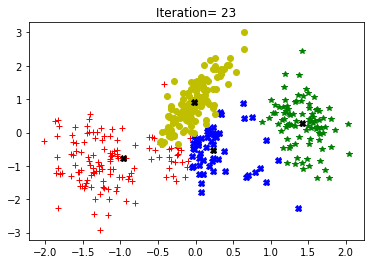

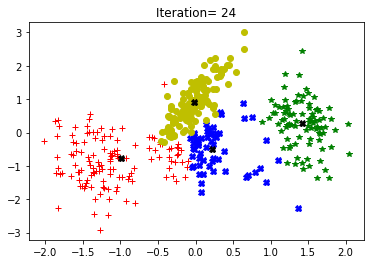

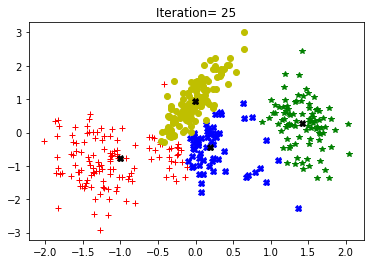

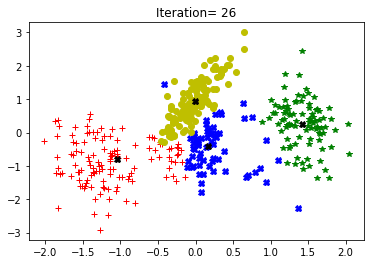

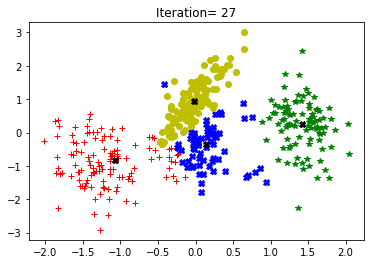

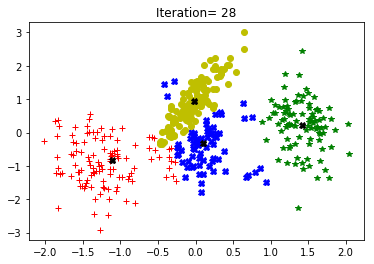

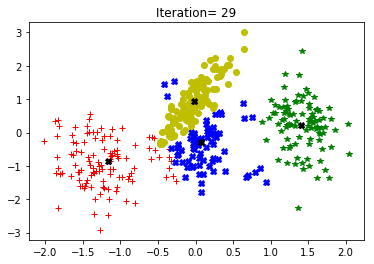

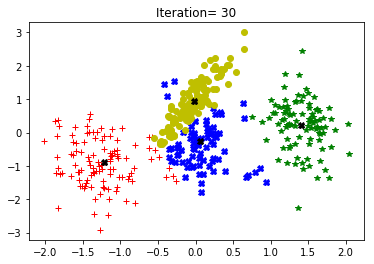

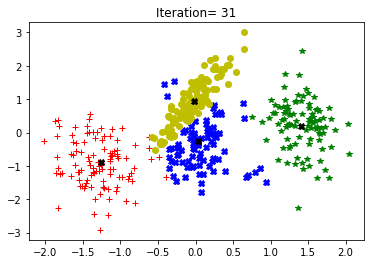

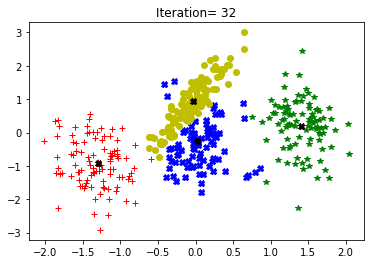

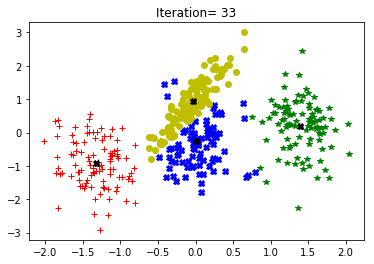

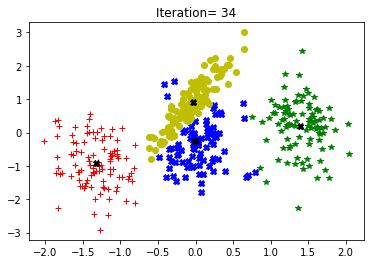

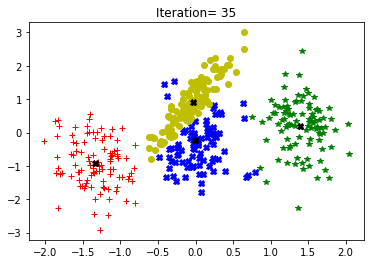

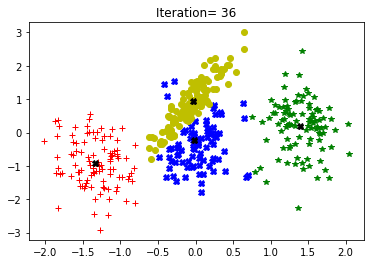

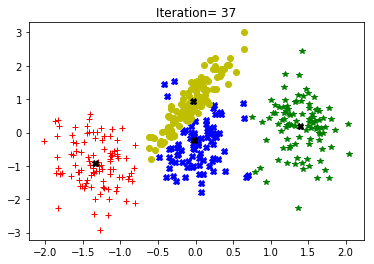

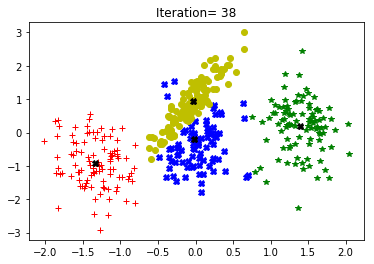

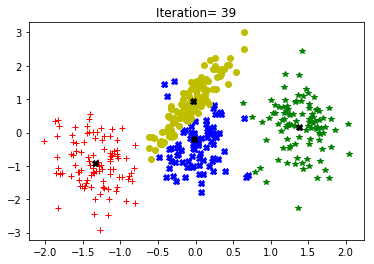

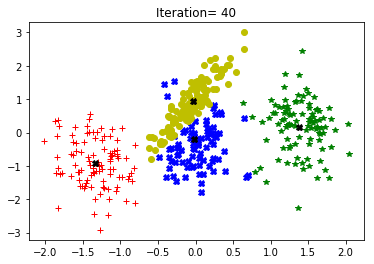

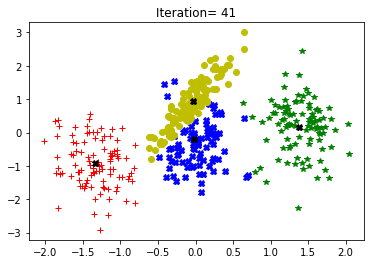

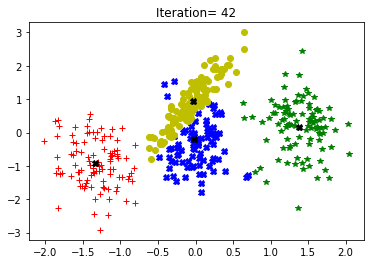

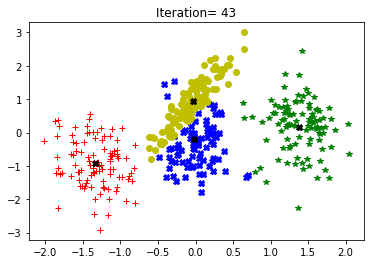

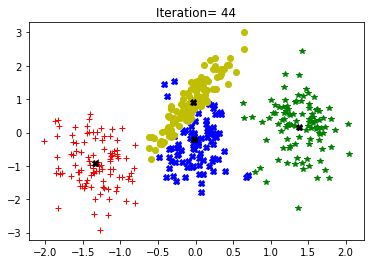

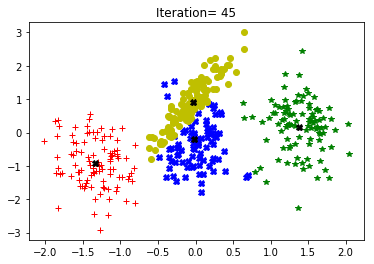

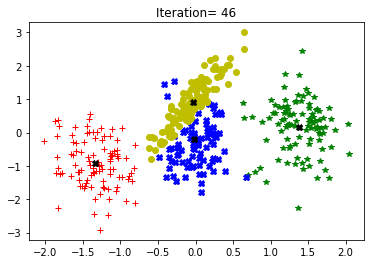

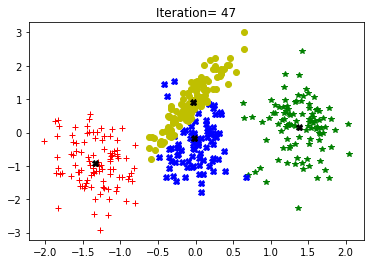

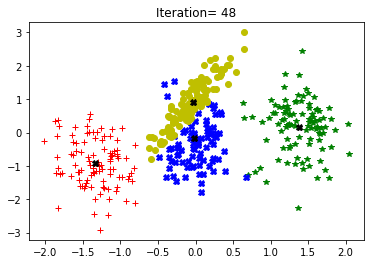

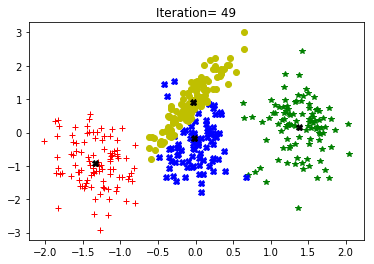

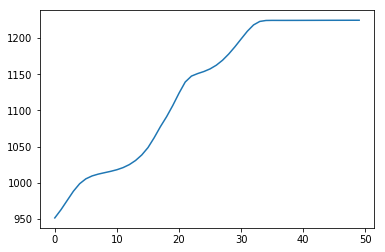

In [18]:


log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K=4   # no. of clusters

theta=initialization(data,K)

for n in range(Itr):

  responsibility=E_Step_GMM(data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data,responsibility)

  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
  Cents=theta[0].T
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

In [19]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=cluster_label
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,lab))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 2
 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 3 2 3 2 2 2 2 3 3 3 2 3 2 2 3 1 2 3 2 2 2 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# 3. Practical Example



## Using K-means

a) Data preparation




1. Load Mnist data
2. Take only two class '1' and '5'


Home work: Take 3 class and perform the K-means clustering

In [21]:
# from google.colab import drive
# drive.mount('/gdrive')
!pip3 install idx2numpy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=306ce0a1c9d3a774f8950d93c04641f9899d93510816096562a194c9208feffe
  Stored in directory: /home/jagabandhu/.cache/pip/wheels/e7/34/28/e6938b3277d94e90acb425f0ea451fd3d4be7713e13f19966f
Successfully built idx2numpy


(11552, 784)
(11552,)
(11552, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


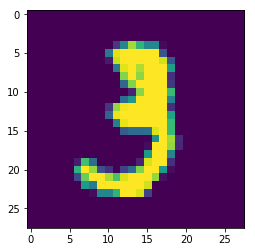

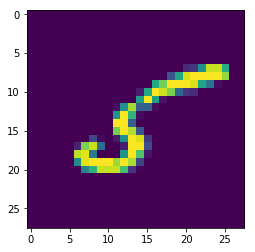

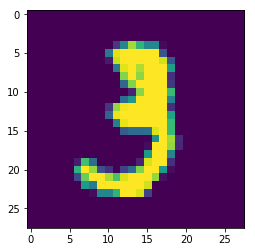

In [22]:
import numpy as np
import matplotlib.pyplot as plt 

file1='/home/jagabandhu/Documents/Machine_learning_workshop_blr/Workshop2/codes_to_share/train-images-idx3-ubyte'
file2='/home/jagabandhu/Documents/Machine_learning_workshop_blr/Workshop2/codes_to_share/train-labels-idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[3,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
#id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
#id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)



print(data.shape)
# just for checking
# data=1-(data+10**(-12))
d=data[1,:]
im=np.reshape(d,(28,28))
plt.figure()
plt.imshow(im)
print(data)

2. Write a function of Kmeans as written earlier

In [23]:
# k-means

def K_means_clustering(data,K,itr,eps):
  # random initialization of clusters
  idx=np.random.randint(0,data.shape[0],K)
  Cents=data[idx,:]


# initialized a array to store distance, assigned label, minimum distance
  DAL=np.zeros((data.shape[0],K+2))
  error=[]
  F=data+10**(-20)   # added a small value as it is a sparse matrix(many values are zero)
  


  for n in range(itr):
# assignment stage
   for i in range(F.shape[0]):
      for j in range(K):
        DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])
        

      Dist=np.min(DAL[i,:K])
      
      ind=((np.where(Dist==DAL[i,:K])[0]))
      
      DAL[i,K]=ind.astype('int')
      DAL[i,K+1]=Dist

# re-estimation stage
   for i in range(K):
      ind=np.where(DAL[:,K]==i)
      
      if (F[ind,:][0].shape[0])==0:
        id1=np.random.randint(0,data.shape[0],1)
        Cents[i,:]=F[id1,:]
      else:
        Cents[i,:]=np.mean(F[ind,:][0],axis=0)


      

   error.append(np.mean(DAL[:,K+1]))  
   #print(Cents)



   if n>2:
      if abs(error[n]-error[n-1])<eps:
         break

   print(n)
   
  return DAL, Cents,error


3. Call the K-means function and plot the mean vectors of the cluster

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


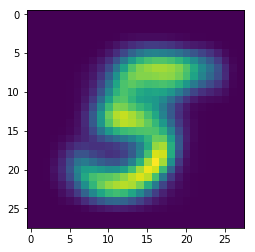

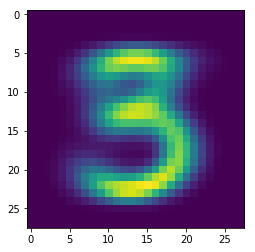

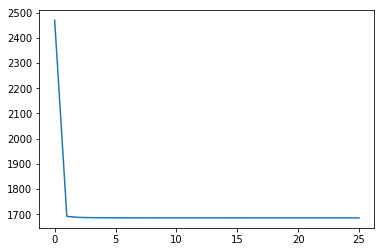

In [24]:
DAL,cents,error=K_means_clustering(data,2,200,10**(-20))

plt.imshow(np.reshape(cents[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents[1,:],(28,28)))

plt.figure()
plt.plot(error)



In [25]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=DAL[:,2]
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[1. 0. 1. ... 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3.

**Use standard scikit tool to perform K-means and GMM clustering**

In [26]:
# Sklearn K-means reference page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=100,max_iter=100,verbose=1)
kmeans.fit(data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34716143845.53814
start iteration
done sorting
end inner loop
Iteration 1, inertia 34100157358.771675
start iteration
done sorting
end inner loop
Iteration 2, inertia 33837444121.152164
start iteration
done sorting
end inner loop
Iteration 3, inertia 33643373552.19754
start iteration
done sorting
end inner loop
Iteration 4, inertia 33505196274.019455
start iteration
done sorting
end inner loop
Iteration 5, inertia 33417090168.192116
start iteration
done sorting
end inner loop
Iteration 6, inertia 33365508133.726322
start iteration
done sorting
end inner loop
Iteration 7, inertia 33336160200.793716
start iteration
done sorting
end inner loop
Iteration 8, inertia 33323530010.557922
start iteration
done sorting
end inner loop
Iteration 9, inertia 33316649387.31369
start iteration
done sorting
end inner loop
Iteration 10, inertia 33312704088.975117
start iteration
done sorting
end inner loop
Iteration 

Iteration 17, inertia 33308300911.433956
start iteration
done sorting
end inner loop
Iteration 18, inertia 33308276073.200306
start iteration
done sorting
end inner loop
Iteration 19, inertia 33308265544.38876
start iteration
done sorting
end inner loop
Iteration 20, inertia 33308259186.31616
start iteration
done sorting
end inner loop
Iteration 21, inertia 33308254018.64867
start iteration
done sorting
end inner loop
Iteration 22, inertia 33308252041.05028
start iteration
done sorting
end inner loop
Iteration 23, inertia 33308252041.05028
center shift 0.000000e+00 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34891023313.355034
start iteration
done sorting
end inner loop
Iteration 1, inertia 33929258866.857082
start iteration
done sorting
end inner loop
Iteration 2, inertia 33464800838.578915
start iteration
done sorting
end inner loop
Iteration 3, inertia 33363520297.13566
start iteration
done sorting
end inner 

Iteration 13, inertia 33308622428.750507
start iteration
done sorting
end inner loop
Iteration 14, inertia 33308512341.703842
start iteration
done sorting
end inner loop
Iteration 15, inertia 33308356163.47326
start iteration
done sorting
end inner loop
Iteration 16, inertia 33308190940.00392
start iteration
done sorting
end inner loop
Iteration 17, inertia 33308126827.99222
start iteration
done sorting
end inner loop
Iteration 18, inertia 33308113521.25308
start iteration
done sorting
end inner loop
Iteration 19, inertia 33308110988.67611
center shift 5.836763e-01 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34693190512.41812
start iteration
done sorting
end inner loop
Iteration 1, inertia 34071745493.184063
start iteration
done sorting
end inner loop
Iteration 2, inertia 33744250255.471634
start iteration
done sorting
end inner loop
Iteration 3, inertia 33538082699.880283
start iteration
done sorting
end inner 

Iteration 23, inertia 33308322727.959023
start iteration
done sorting
end inner loop
Iteration 24, inertia 33308283670.522594
start iteration
done sorting
end inner loop
Iteration 25, inertia 33308267147.73215
start iteration
done sorting
end inner loop
Iteration 26, inertia 33308261998.937706
start iteration
done sorting
end inner loop
Iteration 27, inertia 33308259186.31616
center shift 5.925922e-01 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34842146979.55752
start iteration
done sorting
end inner loop
Iteration 1, inertia 33909291049.296856
start iteration
done sorting
end inner loop
Iteration 2, inertia 33487984317.39048
start iteration
done sorting
end inner loop
Iteration 3, inertia 33379825890.22908
start iteration
done sorting
end inner loop
Iteration 4, inertia 33346074427.2646
start iteration
done sorting
end inner loop
Iteration 5, inertia 33331113424.467022
start iteration
done sorting
end inner loo

Iteration 3, inertia 33535092866.225628
start iteration
done sorting
end inner loop
Iteration 4, inertia 33421927637.55928
start iteration
done sorting
end inner loop
Iteration 5, inertia 33374850410.706066
start iteration
done sorting
end inner loop
Iteration 6, inertia 33347414586.89741
start iteration
done sorting
end inner loop
Iteration 7, inertia 33332890579.924805
start iteration
done sorting
end inner loop
Iteration 8, inertia 33323548804.89091
start iteration
done sorting
end inner loop
Iteration 9, inertia 33317567417.476864
start iteration
done sorting
end inner loop
Iteration 10, inertia 33313970584.690697
start iteration
done sorting
end inner loop
Iteration 11, inertia 33311883478.040207
start iteration
done sorting
end inner loop
Iteration 12, inertia 33310856803.31278
start iteration
done sorting
end inner loop
Iteration 13, inertia 33309979489.552555
start iteration
done sorting
end inner loop
Iteration 14, inertia 33309361383.232056
start iteration
done sorting
end in

Iteration 7, inertia 33335269030.70688
start iteration
done sorting
end inner loop
Iteration 8, inertia 33322783671.890125
start iteration
done sorting
end inner loop
Iteration 9, inertia 33315866791.25262
start iteration
done sorting
end inner loop
Iteration 10, inertia 33311935516.853367
start iteration
done sorting
end inner loop
Iteration 11, inertia 33310150656.403896
start iteration
done sorting
end inner loop
Iteration 12, inertia 33309317741.913296
start iteration
done sorting
end inner loop
Iteration 13, inertia 33308814769.370186
start iteration
done sorting
end inner loop
Iteration 14, inertia 33308539177.527172
start iteration
done sorting
end inner loop
Iteration 15, inertia 33308373311.572414
start iteration
done sorting
end inner loop
Iteration 16, inertia 33308293101.665066
start iteration
done sorting
end inner loop
Iteration 17, inertia 33308267147.73215
start iteration
done sorting
end inner loop
Iteration 18, inertia 33308261998.937706
start iteration
done sorting
e

Iteration 22, inertia 33308113521.25308
start iteration
done sorting
end inner loop
Iteration 23, inertia 33308110988.67611
center shift 5.836763e-01 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34770934484.14443
start iteration
done sorting
end inner loop
Iteration 1, inertia 33616175356.44526
start iteration
done sorting
end inner loop
Iteration 2, inertia 33427473636.69798
start iteration
done sorting
end inner loop
Iteration 3, inertia 33371312937.141808
start iteration
done sorting
end inner loop
Iteration 4, inertia 33344986608.40542
start iteration
done sorting
end inner loop
Iteration 5, inertia 33329697758.265316
start iteration
done sorting
end inner loop
Iteration 6, inertia 33318242302.464767
start iteration
done sorting
end inner loop
Iteration 7, inertia 33313270906.177948
start iteration
done sorting
end inner loop
Iteration 8, inertia 33311501505.944794
start iteration
done sorting
end inner loop


Iteration 1, inertia 33375174979.10615
start iteration
done sorting
end inner loop
Iteration 2, inertia 33332461183.21851
start iteration
done sorting
end inner loop
Iteration 3, inertia 33321346250.64104
start iteration
done sorting
end inner loop
Iteration 4, inertia 33316367280.7602
start iteration
done sorting
end inner loop
Iteration 5, inertia 33313519972.08876
start iteration
done sorting
end inner loop
Iteration 6, inertia 33311711244.628136
start iteration
done sorting
end inner loop
Iteration 7, inertia 33310422443.919262
start iteration
done sorting
end inner loop
Iteration 8, inertia 33309618283.26237
start iteration
done sorting
end inner loop
Iteration 9, inertia 33309022081.395794
start iteration
done sorting
end inner loop
Iteration 10, inertia 33308653716.225525
start iteration
done sorting
end inner loop
Iteration 11, inertia 33308435017.97682
start iteration
done sorting
end inner loop
Iteration 12, inertia 33308312887.002293
start iteration
done sorting
end inner lo

Iteration 8, inertia 33308264312.970364
start iteration
done sorting
end inner loop
Iteration 9, inertia 33308263050.802402
center shift 5.589599e-01 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 35071273976.906395
start iteration
done sorting
end inner loop
Iteration 1, inertia 34338006175.72414
start iteration
done sorting
end inner loop
Iteration 2, inertia 34062494448.64019
start iteration
done sorting
end inner loop
Iteration 3, inertia 33808486899.1656
start iteration
done sorting
end inner loop
Iteration 4, inertia 33617673145.80839
start iteration
done sorting
end inner loop
Iteration 5, inertia 33476948380.118416
start iteration
done sorting
end inner loop
Iteration 6, inertia 33392969696.30152
start iteration
done sorting
end inner loop
Iteration 7, inertia 33347618576.570362
start iteration
done sorting
end inner loop
Iteration 8, inertia 33328441253.968582
start iteration
done sorting
end inner loop
It

Iteration 8, inertia 33316484825.392296
start iteration
done sorting
end inner loop
Iteration 9, inertia 33313142138.19033
start iteration
done sorting
end inner loop
Iteration 10, inertia 33311541204.820568
start iteration
done sorting
end inner loop
Iteration 11, inertia 33310432046.484745
start iteration
done sorting
end inner loop
Iteration 12, inertia 33309686495.875504
start iteration
done sorting
end inner loop
Iteration 13, inertia 33309267508.597797
start iteration
done sorting
end inner loop
Iteration 14, inertia 33309041336.806065
start iteration
done sorting
end inner loop
Iteration 15, inertia 33308798582.49876
start iteration
done sorting
end inner loop
Iteration 16, inertia 33308660861.240284
start iteration
done sorting
end inner loop
Iteration 17, inertia 33308557247.201366
start iteration
done sorting
end inner loop
Iteration 18, inertia 33308442164.706924
start iteration
done sorting
end inner loop
Iteration 19, inertia 33308255156.306946
start iteration
done sorting

Iteration 5, inertia 33340408845.657696
start iteration
done sorting
end inner loop
Iteration 6, inertia 33326452126.36111
start iteration
done sorting
end inner loop
Iteration 7, inertia 33319435744.0809
start iteration
done sorting
end inner loop
Iteration 8, inertia 33315067070.05731
start iteration
done sorting
end inner loop
Iteration 9, inertia 33312829452.60057
start iteration
done sorting
end inner loop
Iteration 10, inertia 33311162517.321846
start iteration
done sorting
end inner loop
Iteration 11, inertia 33310104514.529915
start iteration
done sorting
end inner loop
Iteration 12, inertia 33309401034.631413
start iteration
done sorting
end inner loop
Iteration 13, inertia 33308889342.896915
start iteration
done sorting
end inner loop
Iteration 14, inertia 33308537975.514797
start iteration
done sorting
end inner loop
Iteration 15, inertia 33308365666.473038
start iteration
done sorting
end inner loop
Iteration 16, inertia 33308298880.162556
start iteration
done sorting
end i

Iteration 9, inertia 33313989938.269978
start iteration
done sorting
end inner loop
Iteration 10, inertia 33311914147.265495
start iteration
done sorting
end inner loop
Iteration 11, inertia 33310633930.777042
start iteration
done sorting
end inner loop
Iteration 12, inertia 33309633948.320213
start iteration
done sorting
end inner loop
Iteration 13, inertia 33309085247.770203
start iteration
done sorting
end inner loop
Iteration 14, inertia 33308708558.704353
start iteration
done sorting
end inner loop
Iteration 15, inertia 33308455557.744644
start iteration
done sorting
end inner loop
Iteration 16, inertia 33308329350.851883
start iteration
done sorting
end inner loop
Iteration 17, inertia 33308278671.958656
start iteration
done sorting
end inner loop
Iteration 18, inertia 33308266731.802647
start iteration
done sorting
end inner loop
Iteration 19, inertia 33308266731.802647
center shift 0.000000e+00 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
e

Iteration 8, inertia 33309648551.16873
start iteration
done sorting
end inner loop
Iteration 9, inertia 33308822782.18471
start iteration
done sorting
end inner loop
Iteration 10, inertia 33308437612.852577
start iteration
done sorting
end inner loop
Iteration 11, inertia 33308310705.03982
start iteration
done sorting
end inner loop
Iteration 12, inertia 33308270209.18794
start iteration
done sorting
end inner loop
Iteration 13, inertia 33308253145.09886
start iteration
done sorting
end inner loop
Iteration 14, inertia 33308250609.249496
start iteration
done sorting
end inner loop
Iteration 15, inertia 33308250609.249496
center shift 0.000000e+00 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34072114495.93399
start iteration
done sorting
end inner loop
Iteration 1, inertia 33571756716.73249
start iteration
done sorting
end inner loop
Iteration 2, inertia 33409727520.03495
start iteration
done sorting
end inner loo

Iteration 2, inertia 33338039215.18415
start iteration
done sorting
end inner loop
Iteration 3, inertia 33324878983.59995
start iteration
done sorting
end inner loop
Iteration 4, inertia 33318366279.44292
start iteration
done sorting
end inner loop
Iteration 5, inertia 33314490303.33236
start iteration
done sorting
end inner loop
Iteration 6, inertia 33312163168.155407
start iteration
done sorting
end inner loop
Iteration 7, inertia 33311046358.63356
start iteration
done sorting
end inner loop
Iteration 8, inertia 33310107858.597034
start iteration
done sorting
end inner loop
Iteration 9, inertia 33309456165.958397
start iteration
done sorting
end inner loop
Iteration 10, inertia 33309175629.816875
start iteration
done sorting
end inner loop
Iteration 11, inertia 33308920791.744114
start iteration
done sorting
end inner loop
Iteration 12, inertia 33308730385.153896
start iteration
done sorting
end inner loop
Iteration 13, inertia 33308622428.750507
start iteration
done sorting
end inne

Iteration 2, inertia 34130258603.180492
start iteration
done sorting
end inner loop
Iteration 3, inertia 33672920473.83477
start iteration
done sorting
end inner loop
Iteration 4, inertia 33463686052.56046
start iteration
done sorting
end inner loop
Iteration 5, inertia 33387190010.953167
start iteration
done sorting
end inner loop
Iteration 6, inertia 33350782789.81049
start iteration
done sorting
end inner loop
Iteration 7, inertia 33332696959.149353
start iteration
done sorting
end inner loop
Iteration 8, inertia 33323277379.00614
start iteration
done sorting
end inner loop
Iteration 9, inertia 33317820703.035755
start iteration
done sorting
end inner loop
Iteration 10, inertia 33314601746.60185
start iteration
done sorting
end inner loop
Iteration 11, inertia 33312537672.459633
start iteration
done sorting
end inner loop
Iteration 12, inertia 33310956245.728237
start iteration
done sorting
end inner loop
Iteration 13, inertia 33309951213.225063
start iteration
done sorting
end inne

Iteration 11, inertia 33310560664.828827
start iteration
done sorting
end inner loop
Iteration 12, inertia 33309673067.808773
start iteration
done sorting
end inner loop
Iteration 13, inertia 33309067337.861794
start iteration
done sorting
end inner loop
Iteration 14, inertia 33308659776.29514
start iteration
done sorting
end inner loop
Iteration 15, inertia 33308437600.180183
start iteration
done sorting
end inner loop
Iteration 16, inertia 33308318696.644672
start iteration
done sorting
end inner loop
Iteration 17, inertia 33308269299.553444
start iteration
done sorting
end inner loop
Iteration 18, inertia 33308263065.083546
start iteration
done sorting
end inner loop
Iteration 19, inertia 33308261221.280704
start iteration
done sorting
end inner loop
Iteration 20, inertia 33308261221.280704
center shift 0.000000e+00 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34824514556.51472
start iteration
done sorting
end

Iteration 19, inertia 33308255156.306946
start iteration
done sorting
end inner loop
Iteration 20, inertia 33308134235.45996
start iteration
done sorting
end inner loop
Iteration 21, inertia 33308113521.25308
start iteration
done sorting
end inner loop
Iteration 22, inertia 33308110988.67611
center shift 5.836763e-01 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34880026322.13424
start iteration
done sorting
end inner loop
Iteration 1, inertia 34407492175.7476
start iteration
done sorting
end inner loop
Iteration 2, inertia 34112166189.969284
start iteration
done sorting
end inner loop
Iteration 3, inertia 33853346337.712345
start iteration
done sorting
end inner loop
Iteration 4, inertia 33640549442.17602
start iteration
done sorting
end inner loop
Iteration 5, inertia 33488653069.53255
start iteration
done sorting
end inner loop
Iteration 6, inertia 33402427916.78912
start iteration
done sorting
end inner loop
I

start iteration
done sorting
end inner loop
Iteration 0, inertia 33874344022.939503
start iteration
done sorting
end inner loop
Iteration 1, inertia 33410665252.533794
start iteration
done sorting
end inner loop
Iteration 2, inertia 33343951130.00615
start iteration
done sorting
end inner loop
Iteration 3, inertia 33324397797.421574
start iteration
done sorting
end inner loop
Iteration 4, inertia 33316064290.236088
start iteration
done sorting
end inner loop
Iteration 5, inertia 33312500282.310875
start iteration
done sorting
end inner loop
Iteration 6, inertia 33310803973.65028
start iteration
done sorting
end inner loop
Iteration 7, inertia 33309780513.511723
start iteration
done sorting
end inner loop
Iteration 8, inertia 33309258970.39995
start iteration
done sorting
end inner loop
Iteration 9, inertia 33309035528.289936
start iteration
done sorting
end inner loop
Iteration 10, inertia 33308798582.49876
start iteration
done sorting
end inner loop
Iteration 11, inertia 33308660861.2

Iteration 14, inertia 33311295771.660233
start iteration
done sorting
end inner loop
Iteration 15, inertia 33309844087.082336
start iteration
done sorting
end inner loop
Iteration 16, inertia 33309138127.185524
start iteration
done sorting
end inner loop
Iteration 17, inertia 33308726580.15874
start iteration
done sorting
end inner loop
Iteration 18, inertia 33308449309.38209
start iteration
done sorting
end inner loop
Iteration 19, inertia 33308322727.959023
start iteration
done sorting
end inner loop
Iteration 20, inertia 33308283670.522594
start iteration
done sorting
end inner loop
Iteration 21, inertia 33308267147.73215
start iteration
done sorting
end inner loop
Iteration 22, inertia 33308261998.937706
start iteration
done sorting
end inner loop
Iteration 23, inertia 33308259186.31616
center shift 5.925922e-01 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 35032505972.82233
start iteration
done sorting
end in

Iteration 0, inertia 34982393364.57065
start iteration
done sorting
end inner loop
Iteration 1, inertia 34526982784.00631
start iteration
done sorting
end inner loop
Iteration 2, inertia 34339155217.006687
start iteration
done sorting
end inner loop
Iteration 3, inertia 34138154706.50415
start iteration
done sorting
end inner loop
Iteration 4, inertia 33908364449.23663
start iteration
done sorting
end inner loop
Iteration 5, inertia 33693026025.18012
start iteration
done sorting
end inner loop
Iteration 6, inertia 33530702441.21566
start iteration
done sorting
end inner loop
Iteration 7, inertia 33437089510.7792
start iteration
done sorting
end inner loop
Iteration 8, inertia 33387589873.6044
start iteration
done sorting
end inner loop
Iteration 9, inertia 33353416480.959293
start iteration
done sorting
end inner loop
Iteration 10, inertia 33332896883.379158
start iteration
done sorting
end inner loop
Iteration 11, inertia 33322879752.329884
start iteration
done sorting
end inner loop


Iteration 5, inertia 33325257304.478046
start iteration
done sorting
end inner loop
Iteration 6, inertia 33316716964.926365
start iteration
done sorting
end inner loop
Iteration 7, inertia 33311857586.249638
start iteration
done sorting
end inner loop
Iteration 8, inertia 33309173716.222717
start iteration
done sorting
end inner loop
Iteration 9, inertia 33308439263.64163
start iteration
done sorting
end inner loop
Iteration 10, inertia 33308279205.759632
start iteration
done sorting
end inner loop
Iteration 11, inertia 33308210170.34155
start iteration
done sorting
end inner loop
Iteration 12, inertia 33308194217.270386
start iteration
done sorting
end inner loop
Iteration 13, inertia 33308185443.84513
start iteration
done sorting
end inner loop
Iteration 14, inertia 33308180087.18588
start iteration
done sorting
end inner loop
Iteration 15, inertia 33308177176.88932
start iteration
done sorting
end inner loop
Iteration 16, inertia 33308172737.362278
start iteration
done sorting
end i

Iteration 20, inertia 33308110988.67611
center shift 5.836763e-01 within tolerance 4.030874e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34698090745.71664
start iteration
done sorting
end inner loop
Iteration 1, inertia 33663253408.980038
start iteration
done sorting
end inner loop
Iteration 2, inertia 33476856207.873806
start iteration
done sorting
end inner loop
Iteration 3, inertia 33391153428.243122
start iteration
done sorting
end inner loop
Iteration 4, inertia 33354434133.459927
start iteration
done sorting
end inner loop
Iteration 5, inertia 33333968355.26148
start iteration
done sorting
end inner loop
Iteration 6, inertia 33322920757.011696
start iteration
done sorting
end inner loop
Iteration 7, inertia 33317313450.895824
start iteration
done sorting
end inner loop
Iteration 8, inertia 33314037153.121944
start iteration
done sorting
end inner loop
Iteration 9, inertia 33312072180.883038
start iteration
done sorting
end inner loo

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [27]:
cents=kmeans.cluster_centers_

In [28]:
cents.shape

(2, 784)

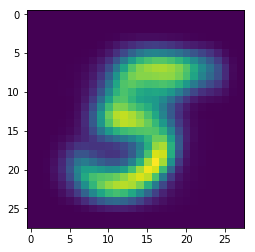

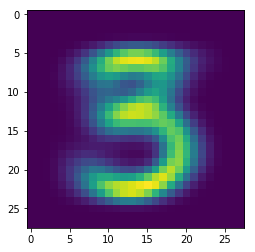

In [29]:
im=np.reshape(cents[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(cents[1,:],(28,28))
plt.figure()
plt.imshow(im)

In [30]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=kmeans.predict(data)
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[1 0 1 ... 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

In [31]:
# GMM scikit (https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.get_params)

from sklearn.mixture import GaussianMixture as Gmm
gmm=Gmm(n_components=2, init_params='kmeans',covariance_type='diag',verbose=1)

In [32]:
gmm.fit(data)

Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
                verbose_interval=10, warm_start=False, weights_init=None)

In [33]:
gmm.get_params(deep=True)

{'covariance_type': 'diag',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 1,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [34]:
means=gmm.means_
vars=gmm.covariances_
weights=gmm.weights_

In [35]:
print(means.shape)
print(vars.shape)
print(weights.shape)

(2, 784)
(2, 784)
(2,)


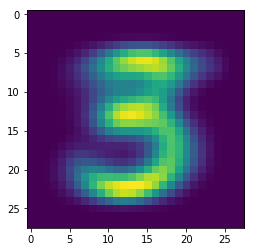

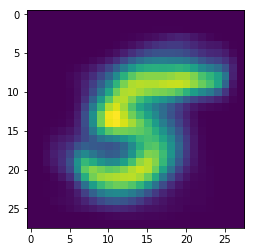

In [36]:
im=np.reshape(means[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(means[1,:],(28,28))
plt.figure()
plt.imshow(im)

In [37]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=gmm.predict(data)
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[0 0 0 ... 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

# 4. Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.


**Divisive Clustering:**

It is an opposite of Agglomerative clustering. In this we start from one cluster which contains all data points in one.  Iteratively we separate all the cluster of points which aren't similar in characteristics. It is also called top-bottom approach.



## Agglomerative Clustering:

Lets start with some domy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [38]:
import numpy as np
def Euclidian_Dist(x,y):
  return np.linalg.norm(x-y)

def Dist_mat(X):
  dist_mat = np.zeros((X.shape[1],X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(X.shape[1]):
      dist_mat[i][j] = round(Euclidian_Dist(X[:,i],X[:,j]),1)
  return dist_mat

def combine(X):
  D_mat = Dist_mat(X)
  maxPossVal =np.inf
  D_mat[(D_mat==0)]=maxPossVal
  print(D_mat)
  minArr = np.min(D_mat, axis=0)
  #print(minArr)
  loc=np.argwhere(D_mat == np.min(minArr))
  loc=loc[0,:]
  #print(loc)
  print('Vector of X to be combined: ', loc+1)

  cluster_comb.append(loc+1)
  #print(loc[1])
  retendedX = X
  retendedX = np.delete(retendedX,max(loc),1)
  retendedX[:,min(loc)] = 0.5*(X[:,loc[0]]+X[:,loc[1]])
  

  newX = retendedX
  #print(newX)

  return newX


In [41]:
!pip3 install plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 13.1 MB 42 kB/s eta 0:00:011    |█████▏                          | 2.1 MB 187 kB/s eta 0:00:59
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=2f0c6446284ff0069b073881de597b2f9c4b2e65cc419edffa14c23f03821204
  Stored in directory: /home/jagabandhu/.cache/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [45]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

cluster_comb=[]
X1=X
print(X)
while X1.shape!=(2,1):
  X1 = combine(X1)

  print('\nMean of clusters after every iteration: \n\n',X1)


print('\ncluster combination order: \n\n',cluster_comb)

## velidate from inbuilt Dendogram

import plotly.figure_factory as ff



lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

[[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
[[inf 1.  5.  6.4 7.4]
 [1.  inf 4.2 5.7 6.7]
 [5.  4.2 inf 1.4 2.5]
 [6.4 5.7 1.4 inf 1.1]
 [7.4 6.7 2.5 1.1 inf]]
Vector of X to be combined:  [1 2]

Mean of clusters after every iteration: 

 [[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[inf 4.6 6.  7.1]
 [4.6 inf 1.4 2.5]
 [6.  1.4 inf 1.1]
 [7.1 2.5 1.1 inf]]
Vector of X to be combined:  [3 4]

Mean of clusters after every iteration: 

 [[1.5  5.   6.25]
 [1.   4.   5.5 ]]
[[inf 4.6 6.5]
 [4.6 inf 2. ]
 [6.5 2.  inf]]
Vector of X to be combined:  [2 3]

Mean of clusters after every iteration: 

 [[1.5   5.625]
 [1.    4.75 ]]
[[inf 5.6]
 [5.6 inf]]
Vector of X to be combined:  [1 2]

Mean of clusters after every iteration: 

 [[3.5625]
 [2.875 ]]

cluster combination order: 

 [array([1, 2]), array([3, 4]), array([2, 3]), array([1, 2])]


# Practical example
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [43]:
data.shape

(11552, 784)

In [44]:
from sklearn.cluster import AgglomerativeClustering as agglo

Aglo=agglo(n_clusters=2,affinity='euclidean', compute_full_tree='auto', linkage='ward')
Aglo.fit(data)

pred_lab=Aglo.fit_predict(data)

In [46]:
from sklearn import metrics

pred_lab=Aglo.fit_predict(data)
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[0 0 0 ... 1 1 1]
[1. 2. 3. 4. 5.]
performance= 0.39397527639986474


## Divisive clustering:

It is a top down approach of hierarchial clustering



1.   Find the biggest cluster (having highest diameter), initially the single cluster is the biggest cluster.

$$Diameter_{cluster}=\max_{i,j}||x_{i}-x_{j}||_{2}$$

$i,j$ will move over all the elements in the cluster.

2.  find the splinter element of the cluster by using the maximum average distance between the other elements. 
$$d_{k}=\frac{1}{N-1}\sum_{i=1}^{N}||x_{k}-x_{i}||_{2}$$
$splinter-group-element=arg \max_{1 \leq k \leq N} (d_{k})$

repeat the same and assign element to the splinter group untill the differance between average incluster distance and average splinter group distance of each element turns negative.

$$d_{avgsplint_{k}}=\frac{1}{M-1}\sum_{i=1}^{M}||x_{k}-x_{i}||_{2}$$

Stop: $$d_{k}-d_{avgsplint_{k}}<0$$
 and assign the splinter group as a new cluster.

 3. Repeat the step 1 and 2 untill each cluster have only one element.

 4. Plot the cluster split with respect to their diameter












In [47]:
import numpy as np
def Euclidian_Dist(x,y):
  return np.linalg.norm(x-y)

def Dist_mat(X):
  dist_mat = np.zeros((X.shape[1],X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(X.shape[1]):
      dist_mat[i][j] = round(Euclidian_Dist(X[:,i],X[:,j]),1)
  return dist_mat


def avg_distance(X):
  Dis_mat=Dist_mat(X)
  D_mat=Dis_mat
  return (np.sum(D_mat,axis=0))/(D_mat.shape[0]-1)

In [48]:
def get_diameter(X, i):
    """Returns the diameter of the ith cluster in X"""
    cluster = np.array(X[i])
    diameter = 0.0
    #print(f'Cluster shape is: {cluster.shape}')
    if cluster.shape[1] == 1: # return 0 if there is only one point in the cluster
        return diameter
    
    for i in range(cluster.shape[1]):
        for j in range(i+1, cluster.shape[1]):
            dist = round(Euclidian_Dist(cluster[:, i], cluster[:, j]), 1)
            if dist > diameter: # Store the max distance b/w any two points in the cluster as diameter
                diameter = dist
    return diameter

def get_biggest_cluster(X):
    """ Returns the cluster index having largest diameter"""
    num_clusters = len(X)
    if num_clusters == 1:
        return 0
    max_distances = np.zeros((num_clusters))
    for i in range(num_clusters):
        max_distances[i] = get_diameter(X, i)
    max_cluster_ind = np.argmax(max_distances) # index having max diameter
    return max_cluster_ind

def avg_spl_dists(cluster, splinter):
    """ Return the average of distances of each point belonging to cl wrt splinter"""
    avg_dists = np.zeros((cluster.shape[1]))
    for i in range(cluster.shape[1]):
        dist = 0.0
        for j in range(splinter.shape[1]):
            dist += round(Euclidian_Dist(cluster[:,i], splinter[:, j]), 1)
        avg_dists[i] = dist / splinter.shape[1]
    return avg_dists

In [49]:
# Implement Divisive Clustering 
import numpy as np
X = np.array([[1,1], [2,1], [5,4], [6,5], [6.5,6]])
X = X.transpose() # Shape after transpose: [2, 5]
num_points = X.shape[1]
print(f'X:\n {X}')

clusters = [X] # List containing the clusters. (only one cluster to begin with)
print(f'Initial Number of clusters: {len(clusters)}')
iter_num = 1
while(len(clusters) != num_points):
    print(f'---------------- Iteraion - {iter_num} -------------------')
    # single iteration of divisive clustering
    biggest_cluster_ind = get_biggest_cluster(clusters) # Choose the cluster having largest diameter from the list of clusters
    print(f'Biggest cluster ind is: {biggest_cluster_ind}')
    biggest_cluster = clusters[biggest_cluster_ind] # The cluster with largest diameter
    print(f'Biggest Cluster is: \n {biggest_cluster}')
    # Split the biggest cluster into two sub clusters: cluster and splinter
    cluster = biggest_cluster
    avg_distances = avg_distance(cluster)
    #print(f'Avg distance: {avg_distances}')
    max_index = np.argmax(avg_distances)
    print(max_index)
    splinter = np.array([cluster[:, max_index]]).transpose() # First member of the splinter group
    cluster = np.delete(cluster, max_index, 1) # Remove the above member from the cluster, as added to splinter now
    print(f'Cluster: \n {cluster} \n Shape: {cluster.shape}')
    print(f'Splinter: \n {splinter} \n Shape: {splinter.shape}')
    
    while(True):
        if cluster.shape[1] == 1:
            break
        avg_self_dists = avg_distance(cluster)
        avg_splinter_dists = avg_spl_dists(cluster, splinter)
        diff = avg_self_dists - avg_splinter_dists
        #print(f'Distances are:\n {avg_self_dists}, {avg_splinter_dists}, {diff}')
        max_diff = np.max(diff)
        if max_diff < 0:
            break
        else: # max_diff > 0 implies a point is more inclined towards splinter than the cluster
            max_diff_ind = np.argmax(diff) # Choose the member having maximum difference and move it to the splinter group
            new_mem = np.array([cluster[:, max_diff_ind]]).transpose() 
            print(f'New member added to splinter of index {max_diff_ind} and new member is \n {new_mem}')
            cluster = np.delete(cluster, max_diff_ind, 1)
            print(f'New cluster shape is {cluster.shape} \n {cluster}') # Shape: [2, cluster_size]
            splinter = np.concatenate((splinter, new_mem), 1)
            print(f'New splinter shape is {splinter.shape} \n {splinter}') # Shape: [2, splinter_size]
    print(f'Final splinter and cluster shapes: {splinter.shape}, {cluster.shape}')
    # Now remove the biggest cluster found from clusters list and add new sub-clusters: cluster and splinter
    clusters.pop(biggest_cluster_ind)
    clusters.append(cluster)
    clusters.append(splinter)
    print(f'New num of clusters after splitting is: {len(clusters)}')
    for a in clusters:
        print(f'{a},')
    iter_num += 1

X:
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
Initial Number of clusters: 1
---------------- Iteraion - 1 -------------------
Biggest cluster ind is: 0
Biggest Cluster is: 
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
0
Cluster: 
 [[2.  5.  6.  6.5]
 [1.  4.  5.  6. ]] 
 Shape: (2, 4)
Splinter: 
 [[1.]
 [1.]] 
 Shape: (2, 1)
New member added to splinter of index 0 and new member is 
 [[2.]
 [1.]]
New cluster shape is (2, 3) 
 [[5.  6.  6.5]
 [4.  5.  6. ]]
New splinter shape is (2, 2) 
 [[1. 2.]
 [1. 1.]]
Final splinter and cluster shapes: (2, 2), (2, 3)
New num of clusters after splitting is: 2
[[5.  6.  6.5]
 [4.  5.  6. ]],
[[1. 2.]
 [1. 1.]],
---------------- Iteraion - 2 -------------------
Biggest cluster ind is: 0
Biggest Cluster is: 
 [[5.  6.  6.5]
 [4.  5.  6. ]]
0
Cluster: 
 [[6.  6.5]
 [5.  6. ]] 
 Shape: (2, 2)
Splinter: 
 [[5.]
 [4.]] 
 Shape: (2, 1)
Final splinter and cluster shapes: (2, 1), (2, 2)
New num of clusters after splitting is: 3
[[1. 2.]
 [1. 1.]],
[[6